<a href="https://colab.research.google.com/github/skrofman/Applied-Machine-Learning/blob/master/DATA_310_Lecture_31_Spring_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA 310 - Lecture 31 Notebook



## <font color='navy'> Examples of optimization with different algorithms

In [ ]:
import random
import numpy as np
from scipy.optimize import least_squares


a, b = random.randint(1, 1000), random.randint(1, 1000)
print("Expect", [a, b, 131])

def f(args):
    x, y, z= args
    return (x-a)**2 + (y-b)**2 + (z-131)**2

x0 = [-1, -3, -10]

result = least_squares(fun=f, x0=x0)

print(result.x)

Expect [828, 586, 131]
[828.00133178 586.00094624 131.00022659]


### In this example we had this function:

$$f(x,y,z):=(x-a)^2+(y-b)^2+(z-131)^2$$

and the gradient is:

$$\nabla f(x,y,z):=(2(x-a),2(y-b),2(z-131))^T$$


## Next we'll optimize the Rosenbrock function

In [ ]:
from scipy.optimize import fmin
from scipy.optimize import fmin_powell
from scipy.optimize import fmin_ncg
from scipy.optimize import fmin_l_bfgs_b
from pylab import *

In [ ]:
def rosen(x):
	return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

def r_grad(x):
        xm = x[1:-1]
        xm_m1 = x[:-2]
        xm_p1 = x[2:]
        grad = zeros(x.shape)
        grad[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
        grad[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
        grad[-1] = 200*(x[-1]-x[-2]**2)
        return grad

def r_hess(x):
        x = asarray(x)
        H = diag(-400*x[:-1],1) - diag(400*x[:-1],-1)
        diagonal = zeros(len(x))
        diagonal[0] = 1200*x[0]-400*x[1]+2
        diagonal[-1] = 200
        diagonal[1:-1] = 202 + 1200*x[1:-1]**2 - 400*x[2:]
        H = H + diag(diagonal)
        return H

In [ ]:
x0 = np.arange(-2,4)
x0[1:]

array([-1,  0,  1,  2,  3])

In [ ]:
xopt = fmin_ncg(rosen,x0,r_grad,fhess=r_hess) 

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 48
         Function evaluations: 67
         Gradient evaluations: 114
         Hessian evaluations: 48


In [ ]:
[xopt,f,d] = fmin_l_bfgs_b(rosen,x0,r_grad,m=20,factr=10)

In [ ]:
xopt = fmin_powell(rosen,x0)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 34
         Function evaluations: 2521


## Examples of Convolutional Neural Network on the MNIST Data

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


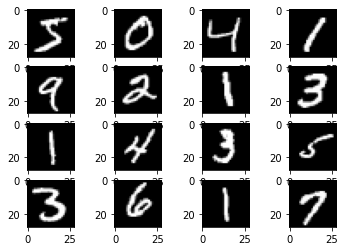

In [ ]:
from keras.utils import to_categorical
# example of loading the mnist dataset
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(16):
	# define subplot
	plt.subplot(4,4,i+1)
	# plot raw pixel data
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [ ]:
# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [ ]:
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

> 97.967
> 97.850
> 97.983
> 98.275
> 98.117


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:79: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:84: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


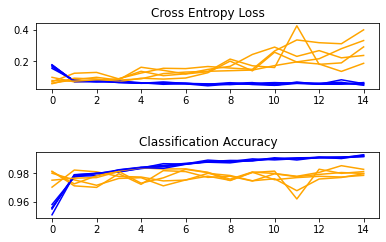

Accuracy: mean=98.038 std=0.145, n=5


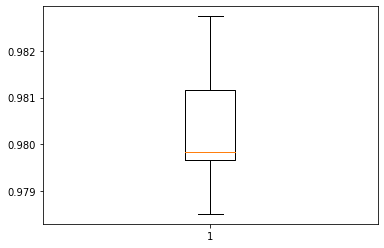

In [ ]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Activation
from keras.optimizers import SGD, Adam
 
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY
 
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm
 
# define cnn model
def define_model():
  model = Sequential()
  model.add(Conv2D(64, (5,5), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(Activation('relu'))
  model.add(Conv2D(32,(3,3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='sigmoid'))
  # compile model
  #opt = SGD(lr=0.01, momentum=0.9)
  opt = Adam(lr=0.005)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model
 
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=15, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories
 
# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(2, 1, 1)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(2, 1, 2)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
		pyplot.tight_layout(pad=3.0)
	pyplot.show()
 
# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()
 
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)
 
# entry point, run the test harness
run_test_harness()